In [1]:
import pandas as pd
from src import soporte_preprocesamiento as sp
import json


In [2]:
df = pd.read_csv("datos/api_rent_madrid.csv", sep=';' ,index_col = 0).reset_index()

In [3]:
df.head(2)

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",...,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN


In [4]:
sp.Eda(df)              #En primer lugar vamos a observar los datos.

El número de filas es 450 y el número de columnas es 38

----------

En este conjunto de datos tenemos 8 valores duplicados

----------

Las columnas con valores nulos y sus porcentajes son:


description                0.222222
hasVideo                   4.000000
status                     4.000000
newDevelopment             4.000000
priceByArea                4.000000
detailedType               4.000000
suggestedTexts             4.000000
hasPlan                    4.000000
has3DTour                  4.000000
has360                     4.000000
hasStaging                 4.000000
superTopHighlight          4.000000
topNewDevelopment          4.000000
externalReference         23.333333
floor                     18.666667
district                  24.888889
neighborhood              61.333333
hasLift                    6.888889
parkingSpace              68.888889
labels                    93.333333
newDevelopmentFinished    96.222222
dtype: float64


----------

Las principales estadísticas de las variables numéricas son:


,count,mean,std,min,25%,50%,75%,max
propertyCode,450.0,9.463515e+07,1.385817e+07,666696.0,97564945.50,98660320.5,98894324.25,98939685.0
numPhotos,450.0,2.190000e+01,9.670346e+00,0.0,15.00,21.0,28.00,72.0
price,450.0,6.717978e+02,8.510060e+01,340.0,640.00,700.0,740.00,750.0
size,450.0,6.823778e+01,3.566256e+01,20.0,47.25,62.0,80.00,371.0
rooms,450.0,1.700000e+00,9.700412e-01,0.0,1.00,2.0,2.00,6.0
bathrooms,450.0,1.213333e+00,4.414998e-01,1.0,1.00,1.0,1.00,3.0
distance,450.0,2.245577e+04,1.700169e+04,183.0,7104.25,20294.0,34979.75,59919.0
priceByArea,432.0,1.186343e+01,5.360971e+00,1.0,8.00,11.0,15.00,33.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,450,6,flat,356
operation,450,1,rent,450
address,450,405,"Calle Valle de Ambles, 2",10
province,450,5,Madrid,358
municipality,450,96,Madrid,170
country,450,1,es,450
latitude,450,433,404.430.651,10
longitude,450,433,-34.659.877,10
description,449,427,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,10
hasVideo,432,2,False,314



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            450 non-null    int64  
 1   numPhotos               450 non-null    int64  
 2   price                   450 non-null    float64
 3   propertyType            450 non-null    object 
 4   operation               450 non-null    object 
 5   size                    450 non-null    float64
 6   exterior                450 non-null    bool   
 7   rooms                   450 non-null    int64  
 8   bathrooms               450 non-null    int64  
 9   address                 450 non-null    object 
 10  province                450 non-null    object 
 11  municipality            450 non-null    object 
 12  country                 450 non-null    object 
 13  latitude                450 non

In [5]:
df = df[df['province'] == 'Madrid']         #Nos quedamos solo con los valores de Madrid, porque solo queremos predecir 
df = df.reset_index(drop=True)              #MADRID

In [ ]:
df['parkingSpace'] = df['parkingSpace'].fillna('{}')        #cambiamos los nulos por los corchetes para realizar el apli


In [105]:
def extract_values_categoria(dictionary):
    """
    Extrae valores específicos del JSON de la columna parking space.

    Args:
    dictionary (str): Cadena JSON que describe el espacio de estacionamiento.

    Returns:
    tuple: Valores extraídos (hasParkingSpace, isParkingSpaceIncludedInPrice, parkingSpacePrice).
    """
    try:
        # Verificar que sea una cadena y realizar correcciones necesarias
        if isinstance(dictionary, str):
            dictionary = dictionary.replace("'", '"').replace("True", '"True"').replace("False", '"False"')

        # Cargar la cadena como JSON
        res = json.loads(dictionary)

        # Extraer los valores requeridos
        hasParkingSpace = res.get('hasParkingSpace')
        isParkingSpaceIncludedInPrice = res.get('isParkingSpaceIncludedInPrice')
        parkingSpacePrice = res.get('parkingSpacePrice')

        return hasParkingSpace, isParkingSpaceIncludedInPrice, parkingSpacePrice

    except (json.JSONDecodeError, AttributeError, TypeError) as e:
        # Manejar errores de formato o claves faltantes
        print(f"Error al procesar el JSON: {e}")
        return None, None, None

In [ ]:
#realizamos el apli para sacar el json de la columna parkinspace
df[['hasParkingSpace','isParkingSpaceIncludedInPrice','parkingSpacePrice']] = df['parkingSpace'].apply(lambda x: pd.Series(extract_values_categoria(x)))

In [6]:
def extract_values_categoria(dictionary):
    print(dictionary)
    b = dictionary.replace('\'', '\"')
    res = json.loads(b)
    print(res)
    typology = res.get('typology')

    subTypology = res.get('subTypology')
    return typology, subTypology

In [7]:
df['detailedType'] = df['detailedType'].fillna('{}')

In [8]:
#realizamos el apli para sacar el json de la columna detailtype
df[['typology', 'subTypology']] = df['detailedType'].apply(lambda x: pd.Series(extract_values_categoria(x)))

{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat', 'subTypology': 'penthouse'}
{'typology': 'flat', 'subTypology': 'penthouse'}
{'typology': 'flat'}
{'typology': 'flat'}
{}
{}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat', 'subTypology': 'duplex'}
{'typology': 'flat', 'subTypology': 'duplex'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat', 'subTypology': 'studio'}
{'typology': 'flat', 'subTypology': 'studio'}
{'typology': 'flat', 'subTypology': 'duplex'}
{'typology': 'flat', 'subTypology': 'duplex'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'chalet', 'subTypology': 'independantHouse'}
{'typology': 'ch

In [9]:
df.head(2)

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished,typology,subTypology
0,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",...,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN,flat,None
1,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,...,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN,flat,None


In [10]:
#Vamos a quedarnos con las columnas que de verdad pueden afectar a la prediccion del precio
df = df.drop(columns=['parkingSpace','detailedType','hasPlan','address','suggestedTexts','newDevelopmentFinished','labels','province','country','propertyCode','numPhotos','latitude','longitude','description','hasVideo','has3DTour','has360','hasStaging','superTopHighlight','topNewDevelopment','externalReference'])


In [11]:
df_duplicados = df[df.duplicated()]
# en nuestro caso, procederemos a eliminar estos valores duplicados, pero debemos tener en cuenta que hay que hacer un análisis detallado de estos valores para entender su origen y gestionarlos correctamente
df.drop_duplicates(inplace = True)

In [12]:
#En segundo lugar vamos a realizar visualizaciones de los datos
Visualizador = sp.Visualizador(df)
Visualizador.separar_dataframes()

(     price  size  rooms  bathrooms  distance  priceByArea
 0    750.0  60.0      1          1      7037         13.0
 1    750.0  70.0      2          1     16145         11.0
 2    400.0  67.0      2          2     55041          6.0
 3    590.0  70.0      3          2     56596          8.0
 4    684.0  45.0      0          1     10656          NaN
 ..     ...   ...    ...        ...       ...          ...
 353  640.0  69.0      2          1     29311          9.0
 354  700.0  54.0      1          1     11656         13.0
 355  700.0  59.0      1          1      7529         12.0
 356  700.0  75.0      2          1     30359          9.0
 357  695.0  62.0      2          1     15162         11.0
 
 [352 rows x 6 columns],
     propertyType operation                municipality status newDevelopment  \
 0           flat      rent                      Madrid   good          False   
 1           flat      rent  San Sebastián de los Reyes   good          False   
 2      penthouse     

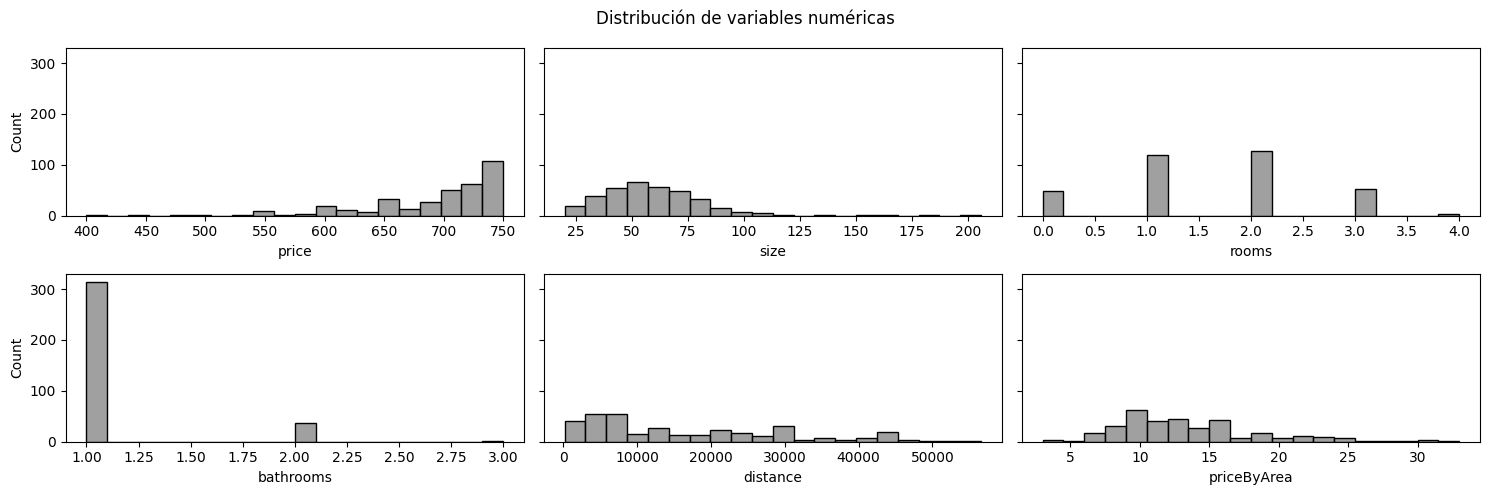

In [13]:
Visualizador.plot_numericas()           #Visualizamos las variables numericas para ver sus distribuciones.